In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')
plt.style.use('fivethirtyeight')

% matplotlib inline

In [2]:
filename  = r'.\data\Salaries.csv'
salaries_df = pd.read_csv(filename)
salaries_df.head(10)

,Id,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,1,Prof,B,19,18,Male,139750
1,2,Prof,B,20,16,Male,173200
2,3,AsstProf,B,4,3,Male,79750
3,4,Prof,B,45,39,Male,115000
4,5,Prof,B,40,41,Male,141500
5,6,AssocProf,B,6,6,Male,97000
6,7,Prof,B,30,23,Male,175000
7,8,Prof,B,45,45,Male,147765
8,9,Prof,B,21,20,Male,119250
9,10,Prof,B,18,18,Female,129000


In [3]:
groupby_rank = salaries_df.groupby(['rank'],as_index=False)['salary'].median().sort_values(by='salary', ascending=True)
rank_order = list(groupby_rank['rank'])
salaries_df['rank_num']=salaries_df['rank'].map(lambda x: rank_order.index(x)+1)

groupby_discipline = salaries_df.groupby(['discipline'],as_index=False)['salary'].median().sort_values(by='discipline', ascending=True)
discipline_order = list(groupby_discipline['discipline'])
salaries_df['discipline_num']=salaries_df['discipline'].map(lambda x: discipline_order.index(x)+1)

sex_order = list(salaries_df['sex'].unique())
salaries_df['sex_num']=salaries_df['sex'].map(lambda x: sex_order.index(x)+1)
salaries_df.head()

,Id,rank,discipline,yrs.since.phd,yrs.service,sex,salary,rank_num,discipline_num,sex_num
0,1,Prof,B,19,18,Male,139750,3,2,1
1,2,Prof,B,20,16,Male,173200,3,2,1
2,3,AsstProf,B,4,3,Male,79750,1,2,1
3,4,Prof,B,45,39,Male,115000,3,2,1
4,5,Prof,B,40,41,Male,141500,3,2,1


In [4]:
salaries = salaries_df [['Id','rank_num','discipline_num','sex_num','yrs.since.phd','yrs.service','salary']]
all_y = salaries[['salary']]
salaries.drop('salary',axis=1,inplace=True)
all_X =salaries
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y = train_test_split(all_X,all_y,test_size=0.2, random_state =17)
print(train_X.shape)
print(test_X.shape)

(317, 6)
(80, 6)


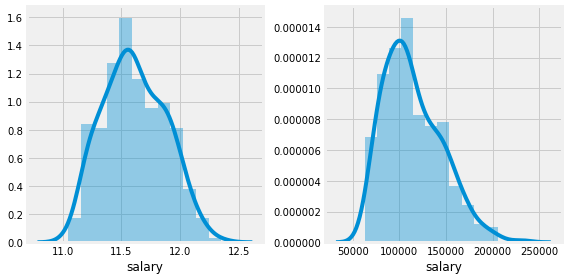

In [5]:
_, axes = plt.subplots(1, 2, figsize=(8, 4))
sns.distplot(np.log1p(train_y['salary']),norm_hist=True,ax =axes[0])
sns.distplot(train_y['salary'],norm_hist=True,ax =axes[1])
plt.tight_layout()
plt.show()

In [6]:
salaries_sex  = salaries_df.groupby(['sex','rank'],as_index=False)['salary'].median().sort_values(by='salary', ascending=True)
salaries_sex

,sex,rank,salary
1,Female,AsstProf,77000.0
4,Male,AsstProf,80182.0
0,Female,AssocProf,90556.5
3,Male,AssocProf,95626.5
2,Female,Prof,120257.5
5,Male,Prof,123996.0


In [7]:
salaries_discipline  = salaries_df.groupby(['discipline'],as_index=False)['salary'].median().sort_values(by='salary', ascending=True)
salaries_discipline

,discipline,salary
0,A,104350.0
1,B,113018.5


In [8]:
train_dataset =train_X.join(train_y) # For visualization 
from datatools.customtransformers import BoxcoxTransformer
#'yrs.since.phd'
bc =BoxcoxTransformer(cols=['yrs.since.phd'])
train_dataset = bc.fit_transform(train_dataset)
train_X = bc.fit_transform(train_X)
test_X = bc.fit_transform(test_X)
train_dataset.head()
 

,Id,rank_num,discipline_num,sex_num,yrs.since.phd,yrs.service,salary
201,202,3,2,1,13.992291,40,119700
223,224,3,2,1,12.512559,20,129600
113,114,3,1,1,13.264073,37,104279
383,384,3,1,1,14.931091,44,105000
371,372,3,1,1,9.502300,20,110515


In [9]:
def reg_plots(train_dataset,continuous_features,target_name):
    fig = plt.figure(figsize=(12, 8))
    fig.subplots_adjust(hspace=0.4, wspace=0.4)
    size =len(continuous_features)
     
    for i in range(size):
        ax = fig.add_subplot(4,3, i+1)
        
        if continuous_features[i] !=target_name:
            sns.regplot( x=continuous_features[i],y=target_name, data =train_dataset ,ax=ax,
                        scatter_kws={'cmap':'jet',"alpha": 0.7}  )
            sns.despine()
    plt.tight_layout()
    plt.show()

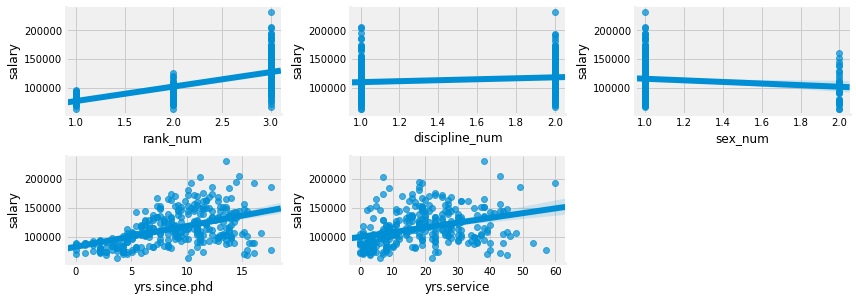

In [10]:
continuous_features = ['rank_num','discipline_num','sex_num','yrs.since.phd','yrs.service']
target_name = 'salary'
reg_plots(train_dataset,continuous_features,target_name)

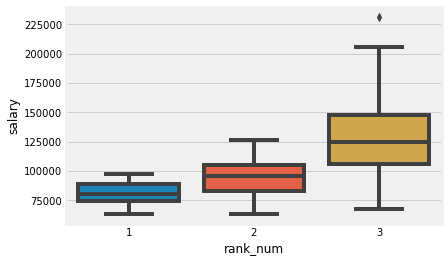

In [11]:
sns.boxplot(x='rank_num', y=target_name, data=train_dataset)

In [12]:
train_dataset[(train_dataset['salary']> 225000) &(train_dataset['rank_num']==3)]  #outlier

,Id,rank_num,discipline_num,sex_num,yrs.since.phd,yrs.service,salary
43,44,3,2,1,13.509273,38,231545


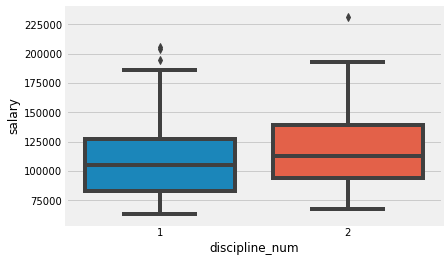

In [13]:
sns.boxplot(x='discipline_num', y=target_name, data=train_dataset)

In [14]:
train_dataset[  (train_dataset['salary']> 190000) 
              & (train_dataset['discipline_num'] ==1)]  #outlier   

,Id,rank_num,discipline_num,sex_num,yrs.since.phd,yrs.service,salary
249,250,3,1,1,11.200063,7,204000
364,365,3,1,1,14.699608,43,205500
271,272,3,1,1,14.466027,18,194800


In [15]:
train_dataset[  (train_dataset['salary']> 225000) 
              & (train_dataset['discipline_num'] ==2)]

,Id,rank_num,discipline_num,sex_num,yrs.since.phd,yrs.service,salary
43,44,3,2,1,13.509273,38,231545


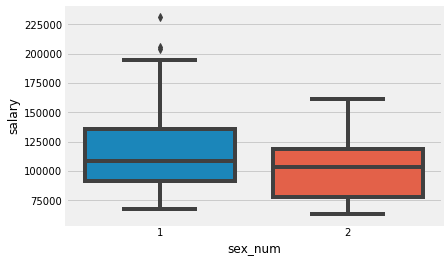

In [16]:
sns.boxplot(x='sex_num', y=target_name, data=train_dataset)

In [17]:
train_dataset[  (train_dataset['salary']> 225000) 
              & (train_dataset['sex_num'] ==1)]

,Id,rank_num,discipline_num,sex_num,yrs.since.phd,yrs.service,salary
43,44,3,2,1,13.509273,38,231545


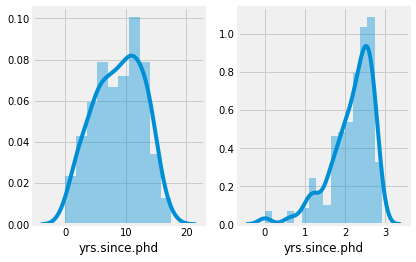

In [18]:
_, axes = plt.subplots(1, 2, figsize=(6, 4))
 
sns.distplot(train_dataset['yrs.since.phd'],norm_hist=True,ax=axes[0])
sns.distplot(np.log1p(train_dataset['yrs.since.phd']),norm_hist=True,ax=axes[1])
plt.show()

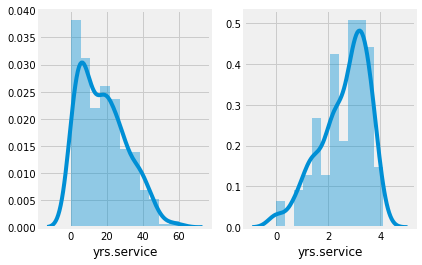

In [19]:
_, axes = plt.subplots(1, 2, figsize=(6, 4))
 
sns.distplot(train_dataset['yrs.service'],norm_hist=True,ax=axes[0])
sns.distplot(np.log1p(train_dataset['yrs.service']),norm_hist=True,ax=axes[1])
plt.show()

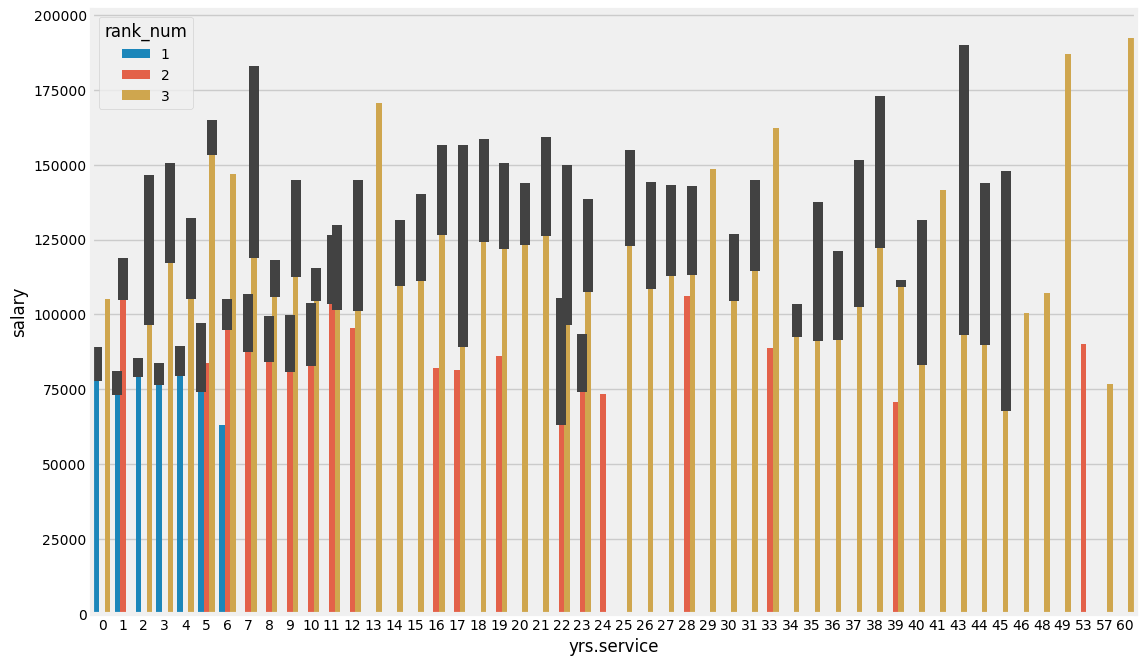

In [20]:
fig = plt.figure(figsize=(12,8),dpi=100)
ax =plt.gca()
sns.barplot(x="yrs.service", y="salary", hue="rank_num", data=train_dataset,ax=ax)
plt.show()

In [21]:
train_dataset.describe()


,Id,rank_num,discipline_num,sex_num,yrs.since.phd,yrs.service,salary
count,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000
mean,197.930599,2.485804,1.539432,1.100946,8.805561,17.804416,114318.100946
std,114.964861,0.769650,0.499231,0.301734,4.067515,13.026248,30928.032278
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,62884.000000
25%,98.000000,2.000000,1.000000,1.000000,5.844037,7.000000,90304.000000
50%,202.000000,3.000000,2.000000,1.000000,8.899111,17.000000,107200.000000
75%,298.000000,3.000000,2.000000,1.000000,11.997197,27.000000,134778.000000
max,396.000000,3.000000,2.000000,2.000000,17.566220,60.000000,231545.000000


In [22]:
test_X.describe()
old_train_X = train_X
old_test_X  = test_X

In [23]:
from sklearn.linear_model  import LinearRegression,Ridge
from sklearn.model_selection import cross_val_score
train_X = old_train_X
test_X = old_test_X
continuous_features = ['rank_num','sex_num','discipline_num','yrs.since.phd','yrs.service'] #,,
train_X =train_X[continuous_features]
test_X = test_X[continuous_features]
linreg = LinearRegression()
linreg.fit(train_X,train_y)
y_pred = linreg.predict(test_X)
scoring ='r2'
lr_scores  = np.mean(cross_val_score(linreg, train_X, train_y, cv=10,scoring =scoring))
print("Linear Regression scores:{0}".format(lr_scores))


Linear Regression scores:0.40240174623674585


In [24]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler,RobustScaler
pipe_lr = make_pipeline(StandardScaler(), LinearRegression())
pipe_lr.fit(train_X,train_y)
y_pred = pipe_lr.predict(test_X)
scoring ='r2'
lr_scores  = np.mean(cross_val_score(pipe_lr, train_X, train_y, cv=5,scoring =scoring))
print("Linear Regression scores:{0}".format(lr_scores))

Linear Regression scores:0.4149919974474975


In [25]:
from sklearn.preprocessing import StandardScaler,RobustScaler
pipe_ridge = make_pipeline(RobustScaler(), Ridge(alpha=10))
pipe_ridge.fit(train_X,train_y)
y_pred = pipe_ridge.predict(test_X)
scoring ='r2'
lr_scores  = np.mean(cross_val_score(pipe_ridge, train_X, train_y, cv=5,scoring ='r2'))
print("Linear Regression scores:{0}".format(lr_scores))

Linear Regression scores:0.4169905158076226


In [26]:
from sklearn.model_selection import GridSearchCV

def create_grid_fit(X,y,model,params):
    grid = GridSearchCV(model,params, cv=5, return_train_score=True, iid=False)
    grid.fit(X,y)
    return grid

In [27]:
def print_model_details(model,results,param):
    print("Best score: %0.3f" % model.best_score_)
    print("Best parameters set:")
    print(model.best_estimator_)
    print(model.best_params_)
    print(model.best_score_)
    #print((model.best_estimator_.coef_!= 0).sum())
    plot_results(results,param)

In [28]:
def plot_results(results,param):
    param ='param_'+ param
    fig = plt.figure(figsize=(5, 3),dpi=100)
    results.plot(param, 'mean_train_score',ax=fig.gca())
    results.plot(param, 'mean_test_score', ax=fig.gca())
    plt.fill_between(results[param].astype(np.float),
                 results['mean_train_score'] + results['std_train_score'],
                 results['mean_train_score'] - results['std_train_score'], alpha=0.2)
    plt.fill_between(results[param].astype(np.float),
                 results['mean_test_score'] + results['std_test_score'],
                 results['mean_test_score'] - results['std_test_score'], alpha=0.2)
    plt.legend()
    plt.xscale("log")

Best score: 0.487
Best parameters set:
Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=3, include_bias=True, interaction_only=True)), ('robustscaler', RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
       with_scaling=True)), ('ridge', Ridge(alpha=0.031622776601683791, copy_X=True, fit_intercept=True,
   max_iter=None, normalize=False, random_state=None, solver='auto',
   tol=0.001))])
{'ridge__alpha': 0.031622776601683791}
0.486814779443


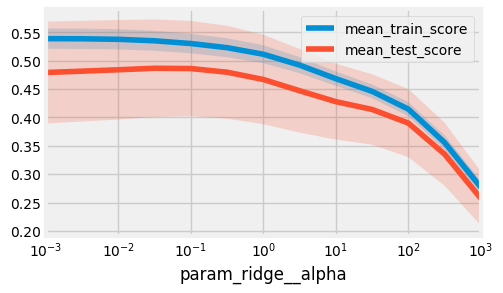

In [29]:
from sklearn.preprocessing import PolynomialFeatures
param ='ridge__alpha'
param_grid = {param :np.logspace(-3,3,13)}
pipe = make_pipeline(PolynomialFeatures(degree=3,interaction_only=True),RobustScaler(with_scaling=True) , Ridge())
ridge_grid = create_grid_fit(train_X,train_y,pipe,param_grid)
results = pd.DataFrame(ridge_grid.cv_results_)
print_model_details(ridge_grid,results,param)

In [30]:
results

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_ridge__alpha,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.016793,0.003597,0.479291,0.539024,0.001,{'ridge__alpha': 0.001},6,0.656923,0.506853,0.442548,...,0.431669,0.550241,0.452774,0.548605,0.412542,0.557005,4.163360e-03,4.893377e-04,0.089811,0.017998
1,0.011795,0.003398,0.481708,0.538773,0.00316228,{'ridge__alpha': 0.00316227766017},4,0.657250,0.506761,0.440809,...,0.437017,0.549931,0.457799,0.548416,0.415666,0.556744,1.326450e-03,4.908757e-04,0.088790,0.017950
2,0.010192,0.002399,0.484143,0.537848,0.01,{'ridge__alpha': 0.01},3,0.657492,0.506184,0.439403,...,0.439011,0.548936,0.464130,0.547659,0.420679,0.555721,1.163138e-03,4.907682e-04,0.087769,0.017842
3,0.009194,0.001999,0.486815,0.535227,0.0316228,{'ridge__alpha': 0.0316227766017},1,0.656252,0.504049,0.442888,...,0.437837,0.546325,0.470470,0.545216,0.426627,0.552573,4.000245e-04,5.352484e-07,0.085939,0.017599
4,0.008596,0.002598,0.486288,0.530390,0.1,{'ridge__alpha': 0.1},2,0.651324,0.499716,0.440513,...,0.434854,0.541623,0.474231,0.540249,0.430516,0.546835,7.989169e-04,4.893758e-04,0.083945,0.017215
5,0.009396,0.002398,0.479837,0.523087,0.316228,{'ridge__alpha': 0.316227766017},5,0.640233,0.493061,0.425816,...,0.429321,0.534537,0.472467,0.532318,0.431349,0.538724,1.354997e-03,4.903686e-04,0.081978,0.016745
6,0.009197,0.002198,0.466990,0.511497,1,{'ridge__alpha': 1.0},7,0.619389,0.482886,0.404478,...,0.416622,0.522940,0.464064,0.519912,0.430395,0.525866,1.469199e-03,3.999721e-04,0.078763,0.015864
7,0.009190,0.002203,0.447150,0.492336,3.16228,{'ridge__alpha': 3.16227766017},8,0.587851,0.466739,0.385791,...,0.391321,0.503795,0.446646,0.500121,0.424143,0.503854,3.893377e-04,4.076962e-04,0.073767,0.014188
8,0.010805,0.002788,0.427924,0.468425,10,{'ridge__alpha': 10.0},9,0.554743,0.446026,0.386936,...,0.362755,0.480409,0.424426,0.475929,0.410760,0.476644,1.167296e-03,7.526176e-04,0.066809,0.012628
9,0.009406,0.002598,0.414148,0.446090,31.6228,{'ridge__alpha': 31.6227766017},10,0.528943,0.425864,0.399279,...,0.339905,0.459064,0.405690,0.453850,0.396924,0.452834,5.032363e-04,7.993341e-04,0.062095,0.012130


In [31]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=4, max_features =None,random_state=0)
regr.fit(train_X,train_y)
y_pred = regr.predict(test_X)
scoring ='r2'
regr_scores  = np.mean(cross_val_score(regr, train_X, train_y, cv=5,scoring=scoring))
print("RandomForest Regression scores:{0}".format(regr_scores))
from sklearn.metrics import r2_score
r2_score(test_y, y_pred) 

RandomForest Regression scores:0.4030942039445614


0.35800113173216885

In [32]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    
    'max_depth': [3,5],
    'max_features': ['auto'],
    'min_samples_leaf': [3,5,8,13],
     
    'n_estimators': [1500]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(train_X,train_y)
grid_search.best_params_

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:  1.1min finished


{'max_depth': 5,
 'max_features': 'auto',
 'min_samples_leaf': 8,
 'n_estimators': 1500}

In [33]:
from sklearn import metrics
from sklearn.metrics import r2_score
regr =grid_search.best_estimator_
regr.fit(train_X,train_y)
y_pred = regr.predict(test_X)

regr_scores  = np.mean(cross_val_score(regr, train_X, train_y, cv=5))
print("RandomForest Regression scores:{0}".format(regr_scores))
import numpy as np
from sklearn import metrics
print("Root Mean Square Error:{0}".format(np.sqrt(metrics.mean_squared_error(test_y, y_pred))))

RandomForest Regression scores:0.44584855201077367
Root Mean Square Error:21244.520856098563


In [34]:
from sklearn.metrics import r2_score
adv_r2 =r2_score(test_y, y_pred)  
print("R2 value :{0}".format(adv_r2))

R2 value :0.40265232064819856
